<a href="https://colab.research.google.com/github/szhang06/Data_Science_Marketing_Use_Case/blob/main/ifood_customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Setup**



In [ ]:
!pip install yellowbrick # install for k-means k selection

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)

In [39]:
data = pd.read_csv("data_clean.csv")
# data.head()

In [40]:
# data.shape

In [41]:
# data.columns

### **Exploratory Data Analysis**

#### Description of data

In [42]:
data.describe()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_YOLO,Marital_Widow,Marital_Alone,Marital_Absurd,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.00000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,54.179603,3497.521209,0.212545,0.258574,0.104693,0.386733,0.000903,0.034296,0.001354,0.000903,563.110108,607.075361,0.298285,0.50361,0.217058,0.164711,0.090253,0.024368
std,3249.376275,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,11.985554,202.434667,0.409201,0.437950,0.306227,0.487112,0.030035,0.182030,0.036777,0.030035,577.183371,602.900476,0.679209,0.50010,0.412335,0.371003,0.286608,0.154224
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,3144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,3324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,69.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,3499.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,342.500000,396.500000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
75%,8421.750000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,3673.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,964.000000,1048.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,3843.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2525.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2216 non-null   int64 
 1   Education            2216 non-null   object
 2   Marital_Status       2216 non-null   object
 3   Income               2216 non-null   int64 
 4   Kidhome              2216 non-null   int64 
 5   Teenhome             2216 non-null   int64 
 6   Dt_Customer          2216 non-null   object
 7   Recency              2216 non-null   int64 
 8   MntWines             2216 non-null   int64 
 9   MntFruits            2216 non-null   int64 
 10  MntMeatProducts      2216 non-null   int64 
 11  MntFishProducts      2216 non-null   int64 
 12  MntSweetProducts     2216 non-null   int64 
 13  MntGoldProducts      2216 non-null   int64 
 14  NumDealsPurchases    2216 non-null   int64 
 15  NumWebPurchases      2216 non-null   int64 
 16  NumCat

In [44]:
# # handling missing values
print("Missing values:", data.isnull().values.sum(axis=0))


Missing values: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [45]:
# Handling dupplicates
duplicates = data[data.duplicated()]
print("Duplicates:", duplicates.shape[0])


Duplicates: 0


In [46]:
data["Income"].astype("int")

0       58138
1       46344
2       71613
3       26646
4       58293
        ...  
2211    61223
2212    64014
2213    56981
2214    69245
2215    52869
Name: Income, Length: 2216, dtype: int64

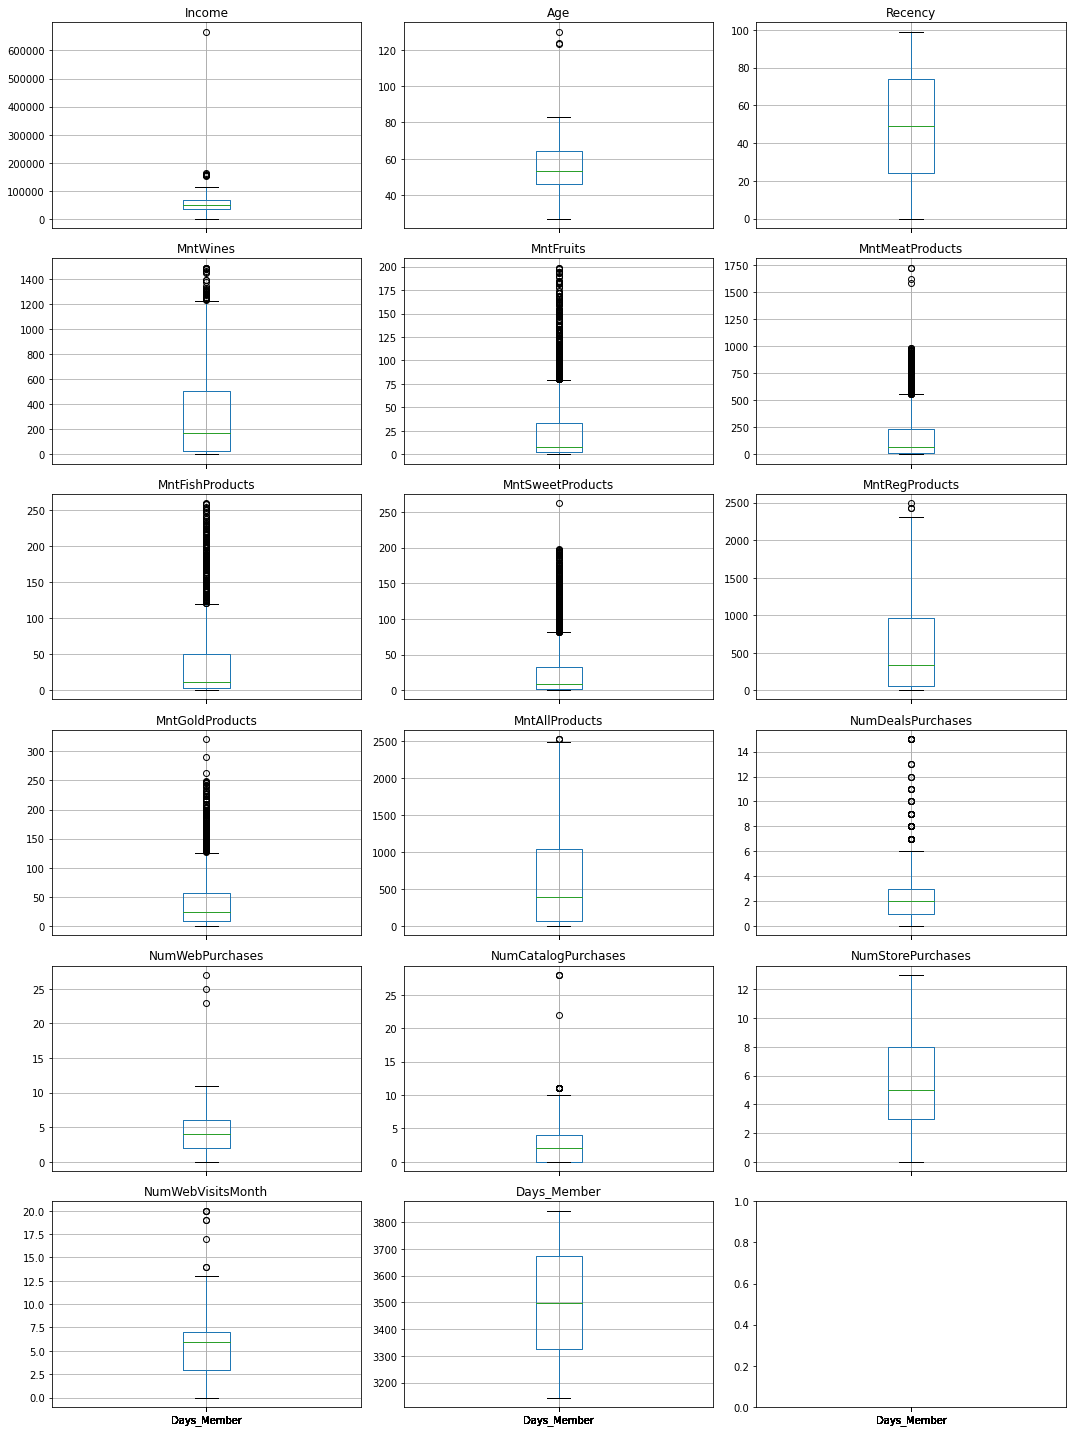

In [47]:
fig, axes = plt.subplots(6, 3, sharex=True, sharey=False, figsize=(15, 20))

axes = axes.flatten()

columns = ['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
          'MntFishProducts', 'MntSweetProducts', 'MntRegProducts', 'MntGoldProducts', 
          'MntAllProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
          'NumStorePurchases', 'NumWebVisitsMonth', 'Days_Member']

for i, column in enumerate(columns):
    data.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()


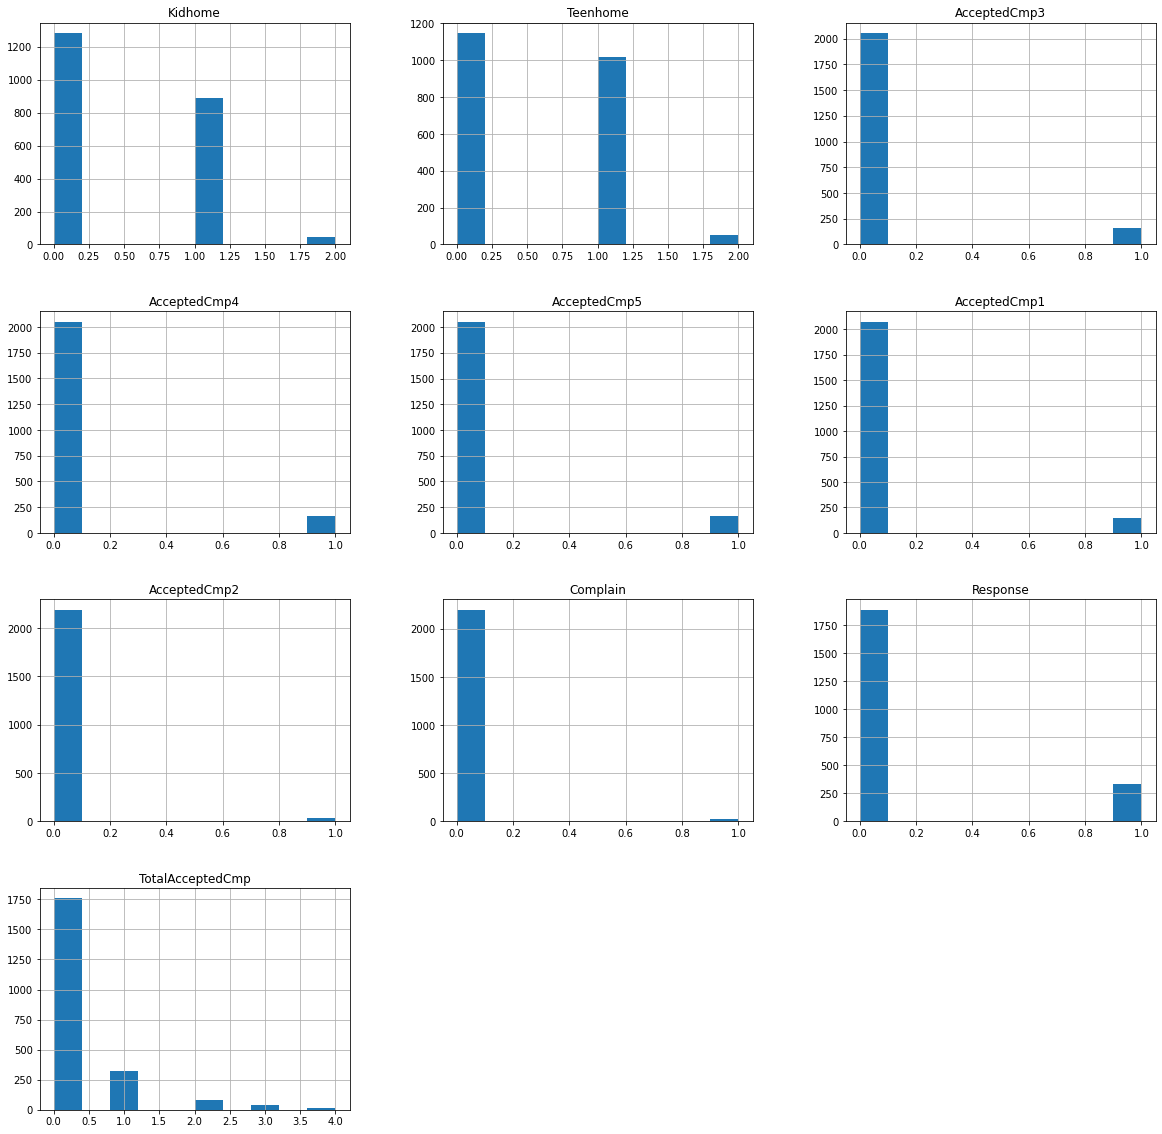

In [48]:
categorical_feature = ["Education", "Marital_Status", "Kidhome", "Teenhome", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "AcceptedCmp1", "AcceptedCmp2","Complain", "Response", "TotalAcceptedCmp"]
data[categorical_feature].hist(figsize=(20, 20))
plt.show()

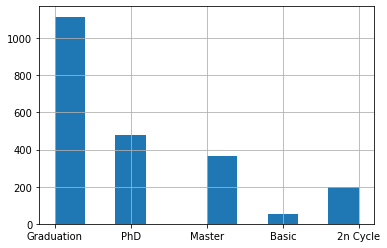

In [49]:
# Explore customer profiles

data["Education"].hist()

plt.show()

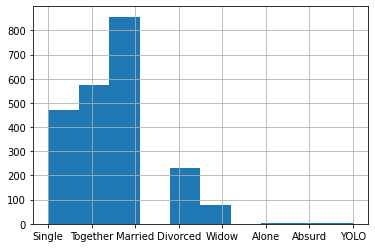

In [50]:

data["Marital_Status"].hist()

plt.show()

Insights:

- Age: There are a few outliers in the data, with customers reported to be over 120 years old. These records may be errors and can be investigated and removed from the analysis.

- Recency: The average recent visit time is 45 days, which could indicate a potential opportunity to increase customer engagement and loyalty. Marketing efforts could be targeted towards reaching out to customers during this time.

- Gold and Regular Products: The amount of gold products purchased ranges from 0 to 50, while the amount of regular products ranges from 0 to 1000. This large difference in range could suggest different customer segments and could warrant further exploration of the characteristics of these segments.

- Deals: The average number of deals purchased by customers is 2. This information could be used to explore ways to increase the number of deals and upsell to customers through personalized offers.

- Membership Duration: The average membership duration is 3500 days, which could indicate a high level of customer satisfaction and loyalty. However, it would still be important to explore ways to retain customers for even longer periods.

- Z_CostContact and Z_Revenue: These features have single digit values in all rows and do not provide any useful information for the analysis. They can be safely removed from the data.


In [51]:
# remove age over 120, double zs could be removed. Income over 600000 could be removed.
outlier_age = data["Age"] > 120
data = data[~outlier_age]

In [52]:
# Handling outliers
upper_bound = np.percentile(data["Income"], 95)
lower_bound = np.percentile(data["Income"], 5)
data = data[(data["Income"] < upper_bound) & (data["Income"] > lower_bound)]
# data.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1, inplace=True)


Observation:

- Education: A high proportion of customers are graduates, followed by Ph.D. or Master's degree holders.
- Marriage: A majority of customers are married, followed by customers being single and living together. Marital status categories such as "alone," "yolo," and "absurd" have little representation and could be combined with the "single" category.
- Children: More than half of the customers do not have children, and the majority of those who do have children have only 1 or 2 children. No customer has more than 2 children.
- Campaign Acceptance: A small percentage of customers accept campaigns, and the acceptance rate for each campaign is similar. The majority of customers who do accept campaigns only accept one time.
- Complaints: Only a very small number of customers have filed complaints, and this information may be disregarded in feature engineering for predictive modeling.

Insight:

- Customer Demographics: The high proportion of customers with graduate or advanced degrees suggests that this group may have higher disposable income or purchasing power, which could be important for marketing and targeting purposes.

- Marital status: The majority of customers being married or living together indicates that family life and domestic needs are important to this customer base, which could impact purchasing decisions.

- Children: The fact that more than half of the customers do not have children and that the majority of those who do have children have only 1 or 2 children suggests that this customer base may have different priorities and needs than those with larger families.

- Campaign Acceptance: The low acceptance rate of campaigns suggests that this customer base may be selective or not highly receptive to marketing efforts, and that companies targeting this customer base may need to consider alternative strategies.

- Complaints: The low number of customer complaints and the fact that this information may be disregarded in feature engineering for predictive modeling suggests that customer satisfaction is high and that complaints are unlikely to be a significant factor in determining customer behavior.

In [54]:
# plot channel distribution

Channel_purchase = data[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum()

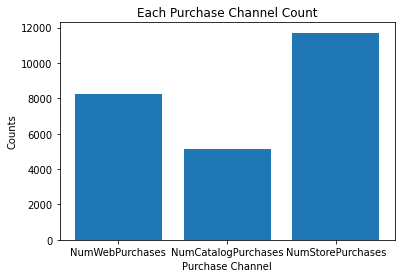

In [55]:
fig, ax = plt.subplots()
ax.bar(Channel_purchase.index.to_list(),Channel_purchase[:].to_list())
plt.xlabel("Purchase Channel")
plt.ylabel("Counts")
plt.title("Each Purchase Channel Count")
plt.show()
     

Insight: 

  Store channel is the most preferred followed by Web and Catalog. This could indicate that customers prefer to physically visit stores, or perhaps the store channel is more accessible or convenient.

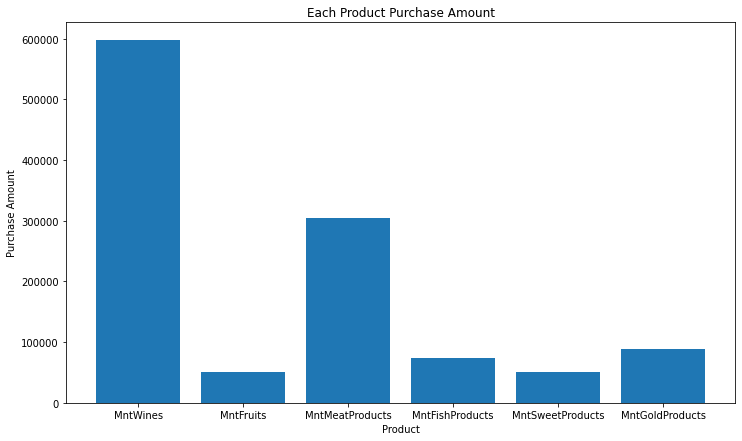

In [56]:
# compare purchase amounts for each products

Amount_purchase = data[['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts',]].sum()
fig, ax = plt.subplots(figsize = (12,7))
ax.bar(Amount_purchase.index.to_list(),Amount_purchase[:].to_list())
plt.xlabel("Product")
plt.ylabel("Purchase Amount")
plt.title("Each Product Purchase Amount")
plt.show()

Insight:

Regarding product purchase amounts,wines are the most purchased product, followed by meat and gold. This could suggest that customers are more inclined towards luxury items such as wines, or it could also be a reflection of the target audience for the products.

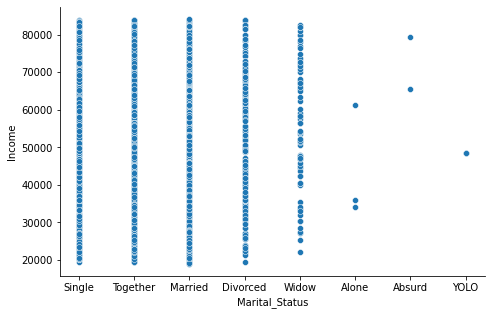

In [57]:
# pairplot marital status vs. income

ax = sns.pairplot(data, x_vars=["Marital_Status"], y_vars=["Income"])
ax.fig.set_size_inches(10, 5)
plt.show()

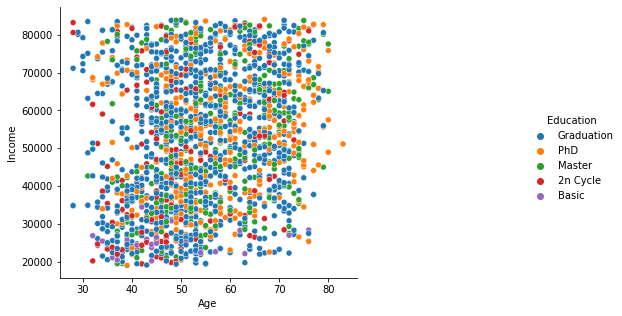

In [58]:
# Income vs. age

ax = sns.pairplot(data, x_vars=["Age"], y_vars=["Income"], hue = "Education")
ax.fig.set_size_inches(10, 5)
plt.show()

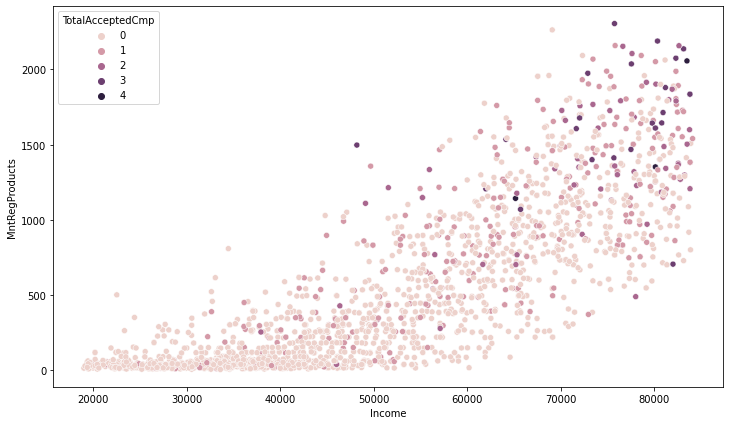

In [59]:
# Income vs. Amount of Regular Products vs. Total Accepted Campaigns

plt.figure(figsize=(12, 7))
ax = sns.scatterplot(x="Income", y='MntRegProducts', hue="TotalAcceptedCmp", data=data)
plt.show()


Observation:
- Marital status, education, income and age do not seem to have a strong relationship with each other.
- There is a positive correlation between income and both the amount of products purchased and campaign acceptance.

Insight:

- Customer Characteristics: The lack of a strong relationship between marital status, education, income, and age suggests that these characteristics may not be strong predictors of customer behavior and that other factors may play a larger role in determining purchasing decisions.

- Affluence: The positive correlation between income and both the amount of products purchased and campaign acceptance suggests that higher income individuals are more likely to spend money and be receptive to marketing efforts. This information could be useful for companies targeting higher-income customers.

- Marketing Strategies: The positive correlation between income and campaign acceptance suggests that higher income individuals may be more responsive to marketing efforts, and that companies may want to consider targeting this group with targeted campaigns.

### Correlation

In [60]:
# Reduce number of features

data["Marital_Single"] = data["Marital_Single"] + data["Marital_YOLO"] + data["Marital_Alone"] + data["Marital_Absurd"]
data.drop(['Marital_YOLO', 'Marital_Alone', 'Marital_Absurd'], axis = 1, inplace = True)

In [ ]:
# corr = corr_data.corr()
# sns.heatmap(corr, cmap='Greens')
# plt.show()

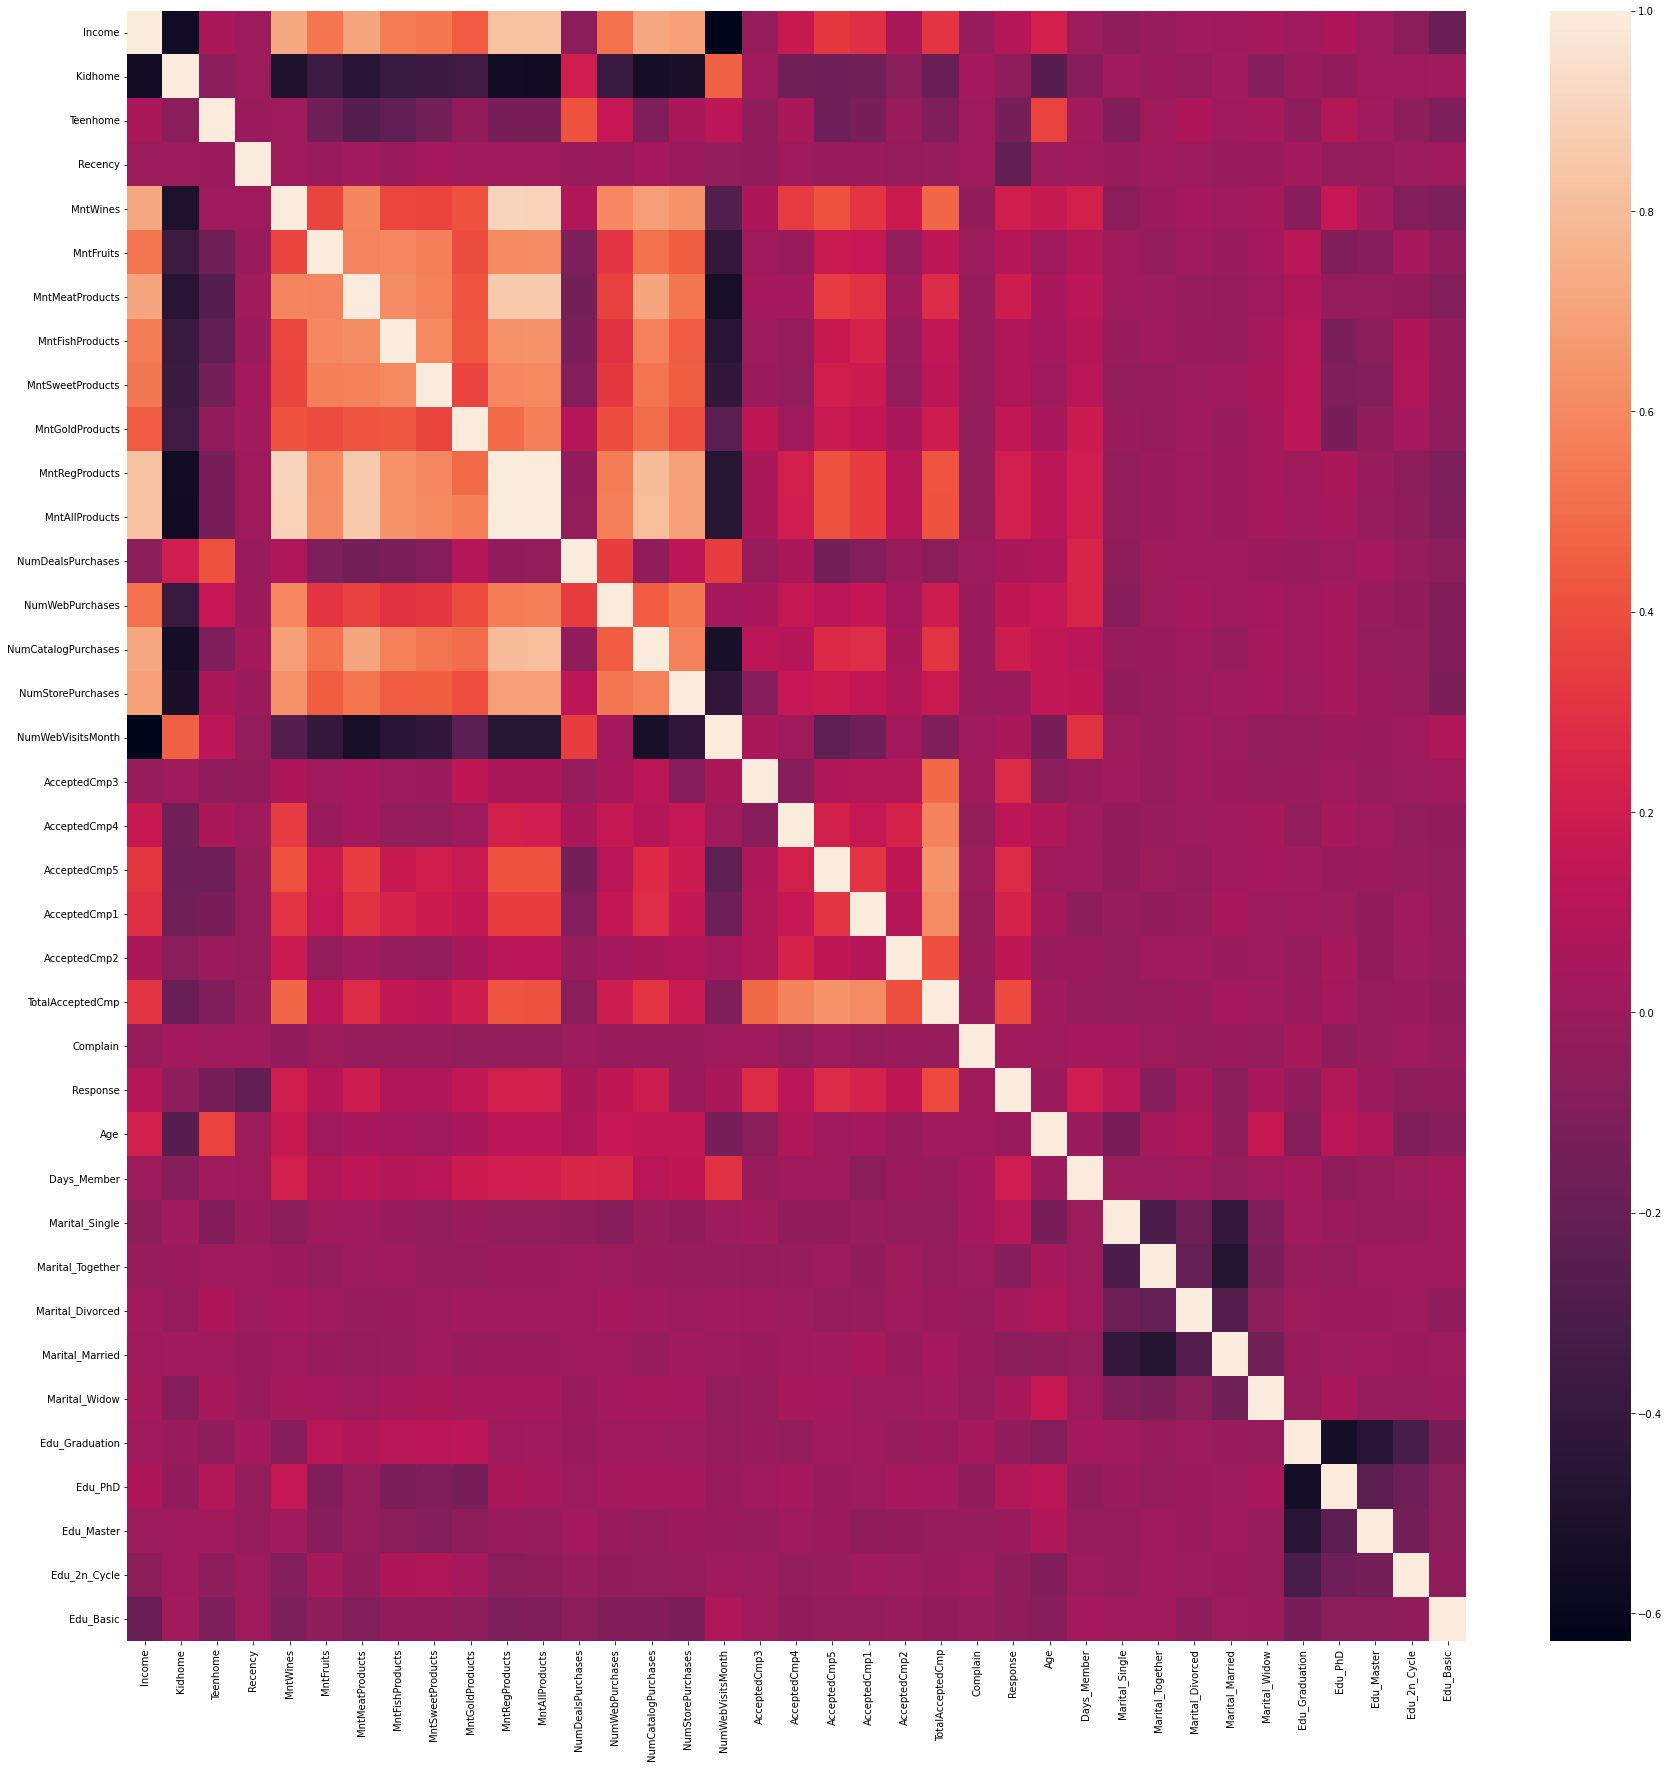

In [63]:
corr_cols= ['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts', 'MntRegProducts', 'MntAllProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'TotalAcceptedCmp',
       'Complain', 'Response', 'Age',
       'Days_Member', 'Marital_Single', 'Marital_Together', 'Marital_Divorced',
       'Marital_Married', 'Marital_Widow', 
    'Edu_Graduation', 'Edu_PhD', 'Edu_Master',
       'Edu_2n_Cycle', 'Edu_Basic']

plt.figure(figsize= (30,30))
corr = data[corr_cols].corr()
sns.heatmap(corr) # annot=True, to display coefficients
plt.show()

Observation:

Income closely relates to wine, meat, regular and all products and catalog and store purchase, and has a negative relation with kids at home and web visits per month. 

Insight:

Income plays a significant role in determining customer behavior as it positively affects the amount of products purchased and purchase channels used.
The lack of relationship between income and kids at home and web visits per month suggests that the number of children at home and the frequency of web visits do not appear to be strongly correlated with income. This could indicate that factors such as time, lifestyle, and personal preferences play a larger role in these behaviors than income.

On the other hand, features such as recency, number of deals purchased, and membership duration are not as relevant in predicting customer behavior, which highlights the importance of conducting further analysis and customer segmentation to gain a deeper understanding of customer behavior.









### Segmentation
  k-means clustering

In [64]:
data_seg = data[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProducts',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age',
       'Days_Member', 'Marital_Single', 'Marital_Together', 'Marital_Divorced',
       'Marital_Married', 'Marital_Widow', 'MntRegProducts', 'MntAllProducts',
       'TotalAcceptedCmp', 'Edu_Graduation', 'Edu_PhD', 'Edu_Master',
       'Edu_2n_Cycle', 'Edu_Basic']]

In [65]:
# standardize data

scaler = StandardScaler()
data_std = scaler.fit_transform(data_seg)

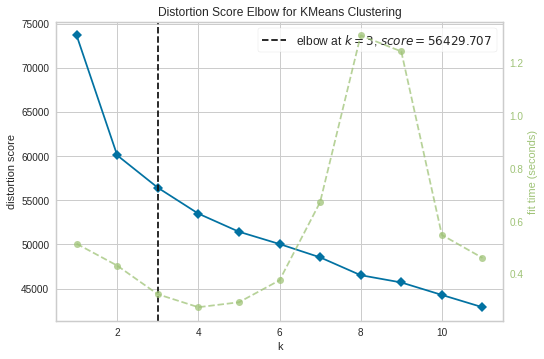

In [66]:
# select k using yellowbrick

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(data_std)
visualizer.show()

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(data_seg)
kmeans.cluster_centers_


array([[ 7.20282291e+04,  1.01321586e-01,  4.56681351e-01,
         4.89383260e+01,  5.89957416e+02,  5.37738620e+01,
         3.42522761e+02,  7.74464023e+01,  5.44596182e+01,
         7.04405286e+01,  1.88252570e+00,  5.48164464e+00,
         5.01174743e+00,  8.49045521e+00,  3.55212922e+00,
         6.31424376e-02,  1.10132159e-01,  1.42437592e-01,
         1.38032305e-01,  1.46842878e-02,  7.34214391e-03,
         1.82085169e-01,  5.64977974e+01,  3.49459618e+03,
         1.85022026e-01,  2.61380323e-01,  1.17474302e-01,
         3.93538913e-01,  4.25844347e-02,  1.11816006e+03,
         1.18860059e+03,  4.68428781e-01,  5.27165932e-01,
         2.33480176e-01,  1.60058737e-01,  7.92951542e-02,
         1.56125113e-17],
       [ 5.12193636e+04,  4.34514638e-01,  8.24345146e-01,
         4.95053929e+01,  2.63523883e+02,  1.54899846e+01,
         8.46841294e+01,  2.21617874e+01,  1.55993837e+01,
         4.35069337e+01,  3.18644068e+00,  4.67026194e+00,
         2.07550077e+00,  5.88

### Segmentation Data Analysis

In [68]:
# check labels and no. of data points in each group

kmeans.labels_

from collections import Counter
Counter(kmeans.labels_)

Counter({1: 649, 0: 681, 2: 661})

In [69]:
# add groups to data

data_seg["Cluster"] = kmeans.labels_ 

In [70]:
# look at the data by clusters
data_analysis = data_seg.groupby("Cluster").mean().round(2)

data_analysis

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_Widow,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,72028.23,0.10,0.46,48.94,589.96,53.77,342.52,77.45,54.46,70.44,1.88,5.48,5.01,8.49,3.55,0.06,0.11,0.14,0.14,0.01,0.01,0.18,56.50,3494.60,0.19,0.26,0.12,0.39,0.04,1118.16,1188.60,0.47,0.53,0.23,0.16,0.08,0.00
1,51219.36,0.43,0.82,49.51,263.52,15.49,84.68,22.16,15.60,43.51,3.19,4.67,2.08,5.89,5.84,0.07,0.08,0.00,0.01,0.02,0.00,0.11,56.69,3502.05,0.20,0.25,0.11,0.39,0.05,401.46,444.97,0.18,0.48,0.25,0.19,0.08,0.00
2,31411.56,0.83,0.36,48.47,37.19,6.23,25.95,9.51,6.28,17.68,2.09,2.22,0.53,3.19,6.76,0.08,0.01,0.00,0.00,0.00,0.02,0.12,50.61,3493.51,0.23,0.27,0.09,0.39,0.02,85.16,102.84,0.09,0.52,0.18,0.15,0.10,0.05


Observation:

- Cluster 0 is characterized by high income and strong purchasing power, with high levels of spending on wine, fruit, meat, fish, sweets, and gold. They are also the largest group in terms of purchasing across all channels and have the highest acceptance rate for campaigns. In terms of personal profile, they have the fewest number of children and the second-largest population of teenagers at home. Their average age is 56.50 years old and they have the highest proportion of graduates, followed by PhD and Master's degree holders. However, they make the fewest web visits and have the least number of deals purchased.

- Cluster 1 has the second-highest income and ranks first in terms of the number of teenagers at home, recency of purchases, number of deals purchased, age, and days of membership. They are also the oldest group among all the customers.

- Cluster 2, which represents the lowest income, has the largest number of children, the most web visits, and the most complaints. They also have the largest proportion of customers with a 2nd cycle or basic education level.

["These observations can provide valuable insights into the different customer segments, including their purchasing behavior, demographic information, and preferences, which can be useful for targeting marketing campaigns, personalizing products, and improving customer experiences."]

Based on the observation, it can be inferred that:

Cluster 0 is characterized by high income, high purchasing power, and a preference for luxury products like wine, gold, and sweet. They have a higher response rate to campaigns, and tend to be older with a higher education level (graduation, PhD, and master), although the polulation with the higher education level does not differ from the other clusters too much. However, they have fewer kids, fewer web visits, and fewer deals purchased.

Cluster 1 has the second-highest income, with a focus on the number of teenagers at home, a recent visit, and the number of deals purchased. They are the oldest group among all clusters, with a longer membership period.

Cluster 2, representing the lowest income group, is characterized by a larger number of kids, more web visits, and more complaints. They have the largest population at lower education level (basic education and 2nd cycle).

Overall, income, education, number of kids, response to campaigns, and preference for luxury products appear to be important factors that differentiate the three clusters. The population of each marital status for each cluster is similar.



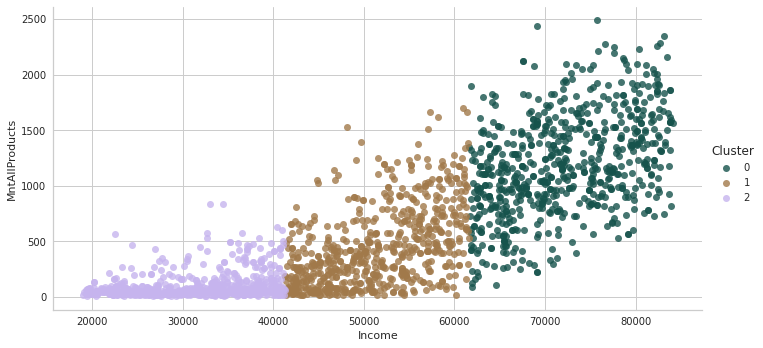

In [71]:
# plot some relations

# - Income vs. amount of all products
sns.set_style('whitegrid')
sns.lmplot(y = 'MntAllProducts', x = 'Income', 
data = data_seg, hue = 'Cluster', palette = 'cubehelix', 
size = 5, aspect = 2, fit_reg = False)
plt.show()

In [73]:
data_seg.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_Widow,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic,Cluster
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3807,1,0,0,0,0,1529,1617,0,1,0,0,0,0,1
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3257,1,0,0,0,0,21,27,0,1,0,0,0,0,1
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3456,0,1,0,0,0,734,776,0,1,0,0,0,0,0
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3283,0,1,0,0,0,48,53,0,1,0,0,0,0,2
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3305,0,0,0,1,0,407,422,0,0,1,0,0,0,1


In [72]:
data_edu = data_seg['Edu_Graduation'].astype("str") + data_seg['Edu_PhD'].astype("str") + data_seg['Edu_Master'].astype("str") + data_seg['Edu_2n_Cycle'].astype("str") + data_seg['Edu_Basic'].astype("str")
data_edu.unique()

array(['10000', '01000', '00100', '00010', '00001'], dtype=object)

In [74]:
data_seg["Education"] = data_edu

In [75]:
conversion_map = {'10000': "Edu_Graduation", '01000': "Edu_PhD", '00100': 'Edu_Master', '00001': 'Edu_Basic', '00010': 'Edu_2n_Cycle'}

data_seg['Education'] = data_seg['Education'].map(conversion_map)
data_seg

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_Widow,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic,Cluster,Education
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3807,1,0,0,0,0,1529,1617,0,1,0,0,0,0,1,Edu_Graduation
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3257,1,0,0,0,0,21,27,0,1,0,0,0,0,1,Edu_Graduation
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3456,0,1,0,0,0,734,776,0,1,0,0,0,0,0,Edu_Graduation
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3283,0,1,0,0,0,48,53,0,1,0,0,0,0,2,Edu_Graduation
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3305,0,0,0,1,0,407,422,0,0,1,0,0,0,1,Edu_PhD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56,3525,0,0,0,1,0,1094,1341,0,1,0,0,0,0,1,Edu_Graduation
2212,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77,3163,0,1,0,0,0,436,444,1,0,1,0,0,0,0,Edu_PhD
2213,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42,3299,0,0,1,0,0,1217,1241,1,1,0,0,0,0,1,Edu_Graduation
2214,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67,3300,0,1,0,0,0,782,843,0,0,0,1,0,0,0,Edu_Master


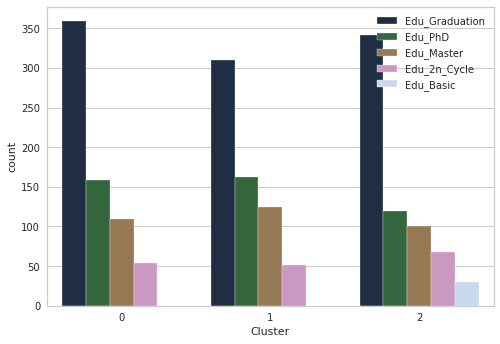

In [76]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.countplot(x='Cluster', data=data_seg, hue = 'Education', palette='cubehelix')
ax.legend(loc='upper right')
plt.show()


In [77]:
data_marital = data_seg['Marital_Single'].astype("str") + data_seg['Marital_Together'].astype("str") + data_seg['Marital_Divorced'].astype("str") + data_seg['Marital_Married'].astype("str") + data_seg['Marital_Widow'].astype("str")
data_marital.unique()

data_seg["Marital_Status"] = data_marital


In [78]:
data_seg.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_Widow,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic,Cluster,Education,Marital_Status
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3807,1,0,0,0,0,1529,1617,0,1,0,0,0,0,1,Edu_Graduation,10000
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3257,1,0,0,0,0,21,27,0,1,0,0,0,0,1,Edu_Graduation,10000
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3456,0,1,0,0,0,734,776,0,1,0,0,0,0,0,Edu_Graduation,01000
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3283,0,1,0,0,0,48,53,0,1,0,0,0,0,2,Edu_Graduation,01000
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3305,0,0,0,1,0,407,422,0,0,1,0,0,0,1,Edu_PhD,00010


In [79]:

conversion_map = {'10000': "Marital_Single", '01000': "Marital_Together", '00100': 'Marital_Divorced', '00001': 'Marital_Widow', '00010': 'Marital_Married'}

data_seg['Marital_Status'] = data_seg['Marital_Status'].map(conversion_map)
data_seg

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Days_Member,Marital_Single,Marital_Together,Marital_Divorced,Marital_Married,Marital_Widow,MntRegProducts,MntAllProducts,TotalAcceptedCmp,Edu_Graduation,Edu_PhD,Edu_Master,Edu_2n_Cycle,Edu_Basic,Cluster,Education,Marital_Status
0,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,66,3807,1,0,0,0,0,1529,1617,0,1,0,0,0,0,1,Edu_Graduation,Marital_Single
1,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,69,3257,1,0,0,0,0,21,27,0,1,0,0,0,0,1,Edu_Graduation,Marital_Single
2,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,58,3456,0,1,0,0,0,734,776,0,1,0,0,0,0,0,Edu_Graduation,Marital_Together
3,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,39,3283,0,1,0,0,0,48,53,0,1,0,0,0,0,2,Edu_Graduation,Marital_Together
4,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,42,3305,0,0,0,1,0,407,422,0,0,1,0,0,0,1,Edu_PhD,Marital_Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,56,3525,0,0,0,1,0,1094,1341,0,1,0,0,0,0,1,Edu_Graduation,Marital_Married
2212,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,77,3163,0,1,0,0,0,436,444,1,0,1,0,0,0,0,Edu_PhD,Marital_Together
2213,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,42,3299,0,0,1,0,0,1217,1241,1,1,0,0,0,0,1,Edu_Graduation,Marital_Divorced
2214,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,67,3300,0,1,0,0,0,782,843,0,0,0,1,0,0,0,Edu_Master,Marital_Together


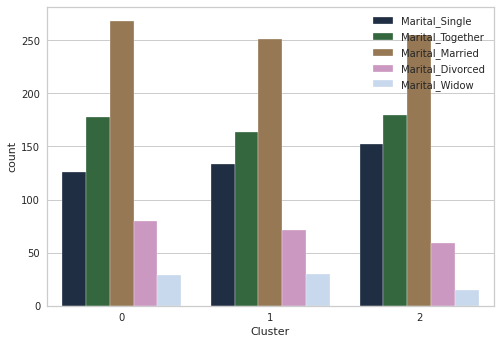

In [80]:
fig = plt.figure()
ax = fig.add_subplot()
ax = sns.countplot(x='Cluster', data=data_seg, hue = 'Marital_Status', palette='cubehelix')
ax.legend(loc='upper right')
plt.show()


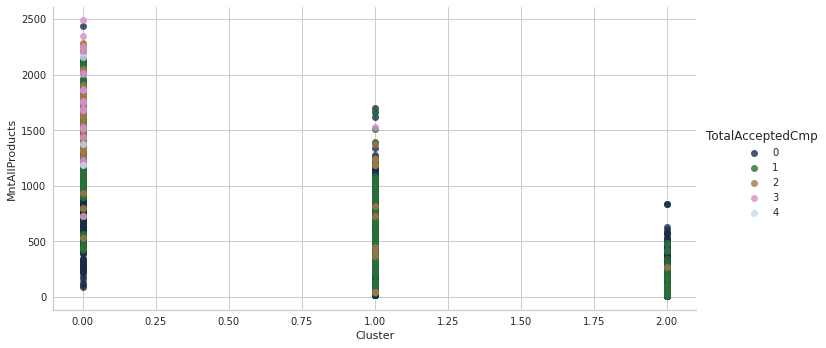

In [81]:
# plot data

# Income vs. amount of all products
sns.set_style('whitegrid')
sns.lmplot(y = 'MntAllProducts', x = 'Cluster', 
data = data_seg, hue = 'TotalAcceptedCmp', palette = 'cubehelix', 
size = 5, aspect = 2, fit_reg = False)
plt.show()

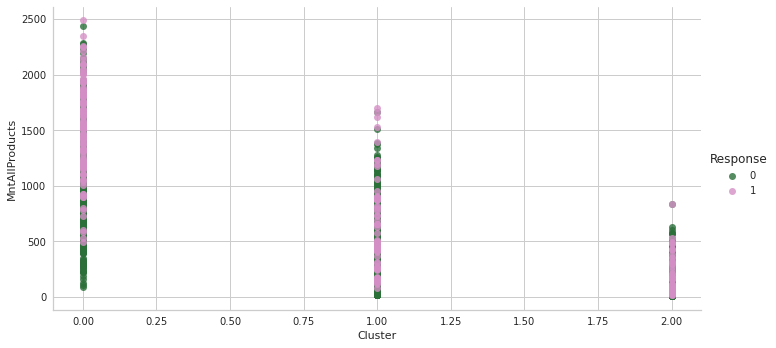

In [82]:
# Income vs. amount of all products vs. response
sns.set_style('whitegrid')
sns.lmplot(y = 'MntAllProducts', x = 'Cluster', 
data = data_seg, hue = 'Response', palette = 'cubehelix', 
size = 5, aspect = 2, fit_reg = False)
plt.show()

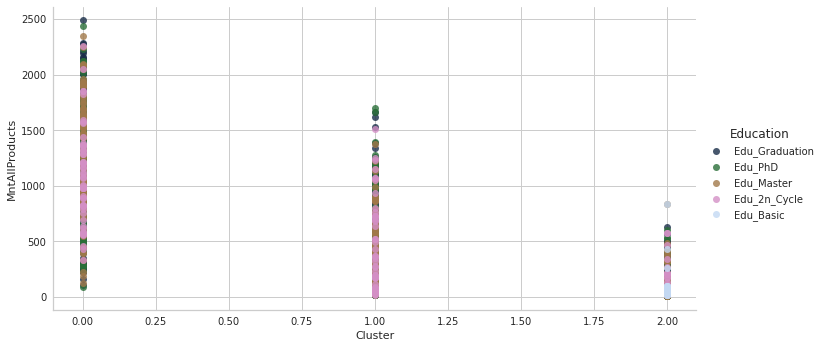

In [83]:
# Income vs. amount of all products vs. education
sns.set_style('whitegrid')
sns.lmplot(y = 'MntAllProducts', x = 'Cluster', 
data = data_seg, hue = 'Education', palette = 'cubehelix', 
size = 5, aspect = 2, fit_reg = False)
plt.show()

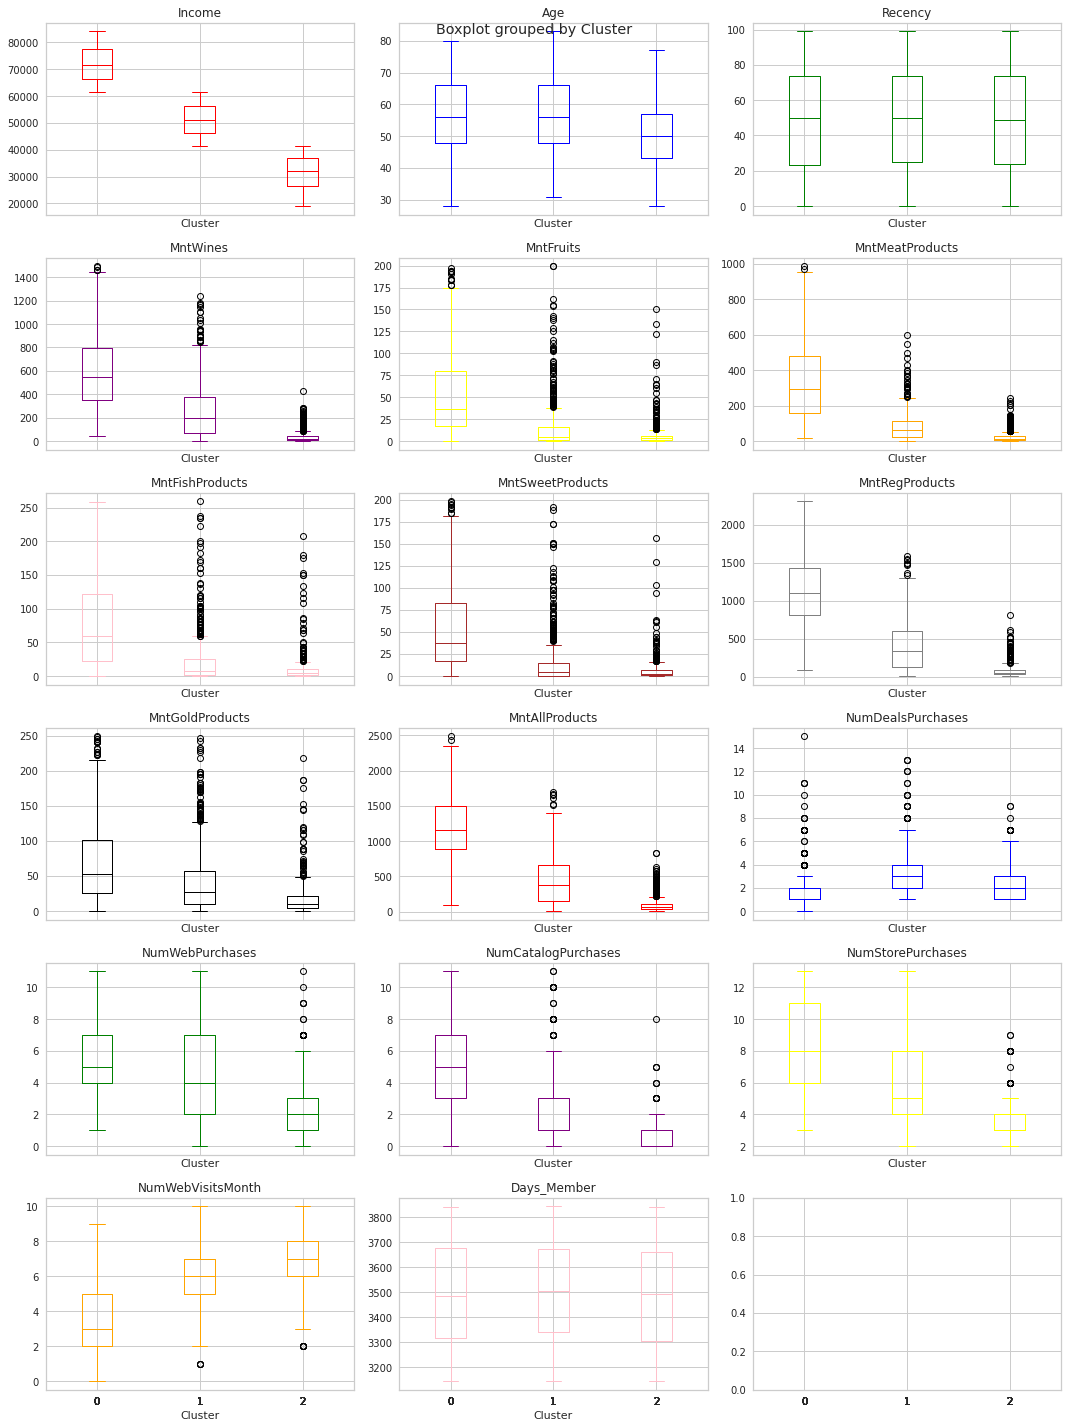

In [84]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(6, 3, sharex=True, sharey=False, figsize=(15, 20))

axes = axes.flatten()

colors = ['red', 'blue', 'green', 'purple', 'yellow', 'orange', 'pink', 'brown', 'gray', 'black']

for i, column in enumerate(['Income', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntRegProducts', 'MntGoldProducts', 
                           'MntAllProducts', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                           'NumStorePurchases', 'NumWebVisitsMonth', 'Days_Member']):
    data_seg.boxplot(column=column, by='Cluster', ax=axes[i], color=colors[i % len(colors)])

plt.tight_layout()

plt.show()


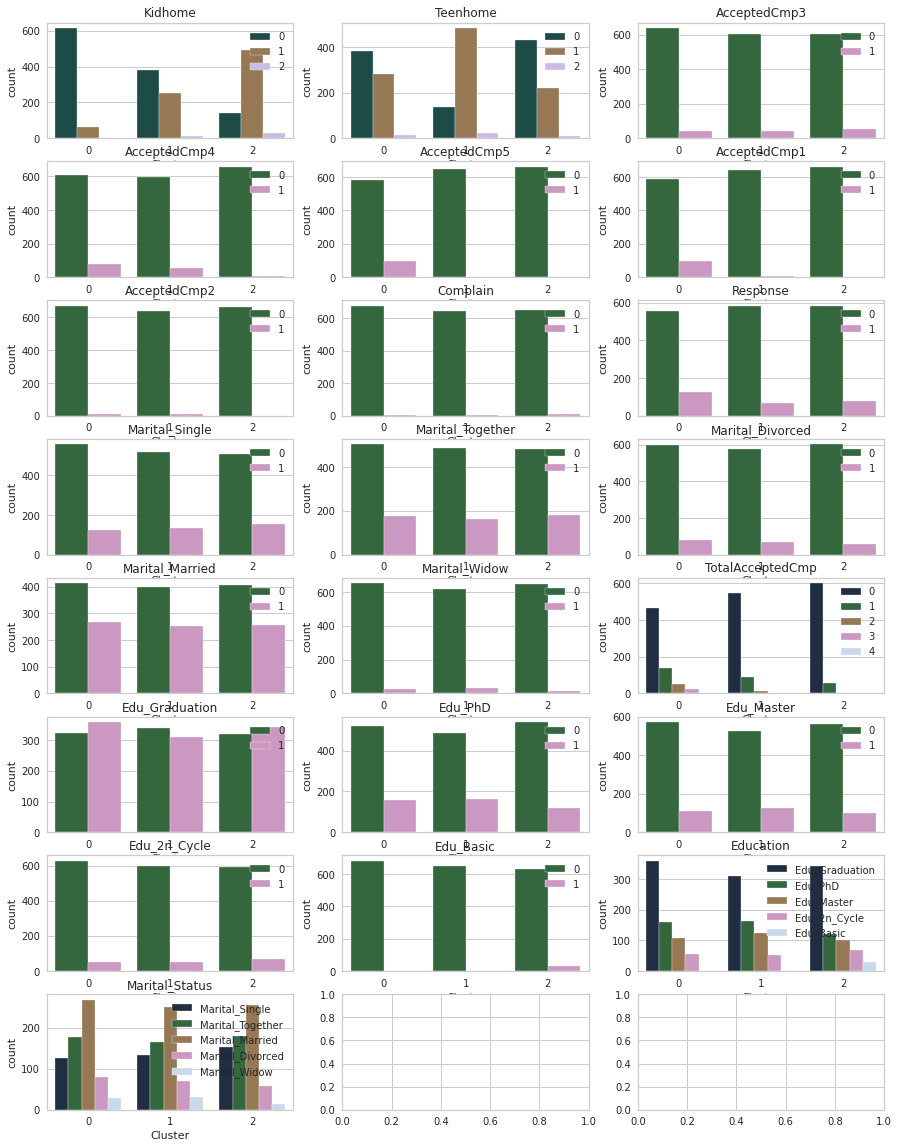

In [85]:
# plot histgram for categorical values by cluster

fig, ax = plt.subplots(nrows=8, ncols=3, figsize=(15, 20))

count = 0
for i in ['Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Marital_Single', 'Marital_Together', 'Marital_Divorced', 'Marital_Married', 'Marital_Widow', 'TotalAcceptedCmp', 'Edu_Graduation', 'Edu_PhD', 'Edu_Master', 'Edu_2n_Cycle', 'Edu_Basic', 'Education', 'Marital_Status']:
  sns.countplot(x='Cluster', data=data_seg, hue = i, palette='cubehelix', ax=ax[count//3, count%3])
  ax[count//3, count%3].legend(loc='upper right')
  ax[count//3, count%3].set_title(i)
  count += 1

plt.show()
